In [1]:
import pandas as pd
import numpy as np


In [2]:
ligamx=pd.read_csv('https://raw.githubusercontent.com/footballcsv/mexico/master/2020s/2020-21/mx.1.csv')
ligamx.head()

,Stage,Round,Date,Team 1,FT,Team 2
0,Apertura,1,Sat Jul 25 2020,Club Necaxa,0-3,Tigres UANL
1,Apertura,1,Sun Jul 26 2020,CD Guadalajara Chivas,0-0,Club León
2,Apertura,1,Sun Jul 26 2020,Club Tijuana,3-1,Club Atlas
3,Apertura,1,Sun Jul 26 2020,Cruz Azul,2-0,Santos Laguna
4,Apertura,1,Sun Jul 26 2020,Pumas UNAM,3-2,Querétaro FC


In [3]:
ligamx.isnull()

,Stage,Round,Date,Team 1,FT,Team 2
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
148,False,False,False,False,False,False
149,False,False,False,False,False,False
150,False,False,False,False,False,False
151,False,False,False,False,False,False


In [4]:
ligamx['FT'].str.split()


0      [0-3]
1      [0-0]
2      [3-1]
3      [2-0]
4      [3-2]
       ...  
148    [1-1]
149    [1-2]
150    [2-2]
151    [4-0]
152    [2-2]
Name: FT, Length: 153, dtype: object

In [5]:
resultados=ligamx['FT'].str.split('-',expand=True)
resultados.columns=['homeGoals', 'AwayGoals']

In [6]:
ligamx=pd.concat([ligamx,resultados],axis=1)
ligamx

,Stage,Round,Date,Team 1,FT,Team 2,homeGoals,AwayGoals
0,Apertura,1,Sat Jul 25 2020,Club Necaxa,0-3,Tigres UANL,0,3
1,Apertura,1,Sun Jul 26 2020,CD Guadalajara Chivas,0-0,Club León,0,0
2,Apertura,1,Sun Jul 26 2020,Club Tijuana,3-1,Club Atlas,3,1
3,Apertura,1,Sun Jul 26 2020,Cruz Azul,2-0,Santos Laguna,2,0
4,Apertura,1,Sun Jul 26 2020,Pumas UNAM,3-2,Querétaro FC,3,2
...,...,...,...,...,...,...,...,...
148,Apertura,17,Sun Nov 8 2020,Tigres UANL,1-1,Club Atlas,1,1
149,Apertura,17,Sun Nov 8 2020,Cruz Azul,1-2,Pumas UNAM,1,2
150,Apertura,17,Sun Nov 8 2020,Deportivo Toluca FC,2-2,Club León,2,2
151,Apertura,17,Mon Nov 9 2020,Santos Laguna,4-0,Mazatlán FC,4,0


In [ ]:
ligamx.drop('FT',axis=1,inplace=True)





In [7]:
ligamx.dtypes
ligamx=ligamx.astype({'homeGoals':int,'AwayGoals':int})

In [8]:
ligamx.dtypes

Stage        object
Round         int64
Date         object
Team 1       object
FT           object
Team 2       object
homeGoals     int64
AwayGoals     int64
dtype: object

In [ ]:
ligamx.query('homeGoals>AwayGoals')

,Stage,Round,Date,Team 1,Team 2,homeGoals,AwayGoals
2,Apertura,1,Sun Jul 26 2020,Club Tijuana,Club Atlas,3,1
3,Apertura,1,Sun Jul 26 2020,Cruz Azul,Santos Laguna,2,0
4,Apertura,1,Sun Jul 26 2020,Pumas UNAM,Querétaro FC,3,2
8,Apertura,1,Wed Jul 29 2020,CF Monterrey,Deportivo Toluca FC,3,1
10,Apertura,2,Sat Aug 1 2020,FC Juárez,Club Necaxa,1,0
...,...,...,...,...,...,...,...
142,Apertura,16,Mon Nov 2 2020,Club América,Tigres UANL,3,1
143,Apertura,16,Tue Nov 3 2020,Club León,Santos Laguna,2,1
144,Apertura,17,Sat Nov 7 2020,Club Puebla,Atlético San Luis,1,0
146,Apertura,17,Sun Nov 8 2020,CD Guadalajara Chivas,CF Monterrey,3,1


In [9]:
for index, row in ligamx.iterrows():
   if(row['homeGoals']>row['AwayGoals']):
     ligamx.loc[index, 'Result']='H'
   elif(row['homeGoals']<row['AwayGoals']):
     ligamx.loc[index, 'Result']='A'
   elif(row['homeGoals']==row['AwayGoals']):
        ligamx.loc[index, 'Result']='D'



ligamx


,Stage,Round,Date,Team 1,FT,Team 2,homeGoals,AwayGoals,Result
0,Apertura,1,Sat Jul 25 2020,Club Necaxa,0-3,Tigres UANL,0,3,A
1,Apertura,1,Sun Jul 26 2020,CD Guadalajara Chivas,0-0,Club León,0,0,D
2,Apertura,1,Sun Jul 26 2020,Club Tijuana,3-1,Club Atlas,3,1,H
3,Apertura,1,Sun Jul 26 2020,Cruz Azul,2-0,Santos Laguna,2,0,H
4,Apertura,1,Sun Jul 26 2020,Pumas UNAM,3-2,Querétaro FC,3,2,H
...,...,...,...,...,...,...,...,...,...
148,Apertura,17,Sun Nov 8 2020,Tigres UANL,1-1,Club Atlas,1,1,D
149,Apertura,17,Sun Nov 8 2020,Cruz Azul,1-2,Pumas UNAM,1,2,A
150,Apertura,17,Sun Nov 8 2020,Deportivo Toluca FC,2-2,Club León,2,2,D
151,Apertura,17,Mon Nov 9 2020,Santos Laguna,4-0,Mazatlán FC,4,0,H


In [10]:
ligamx['WinningTeam'] = [ligamx['Team 1'].values[i]
                        if ligamx['Result'].values[i] == 'H'
                        else
                        ligamx['Team 2'].values[i]
                        if ligamx['Result'].values[i] == 'A'
                        else
                         np.nan for i in range(len(ligamx))]


In [11]:
ligamx['LosingTeam'] =   [ligamx['Team 1'].values[i]
                        if ligamx['Result'].values[i] == 'A'
                        else
                        ligamx['Team 2'].values[i]
                        if ligamx['Result'].values[i] == 'H'
                        else
                        np.nan for i in range(len(ligamx))]


In [12]:
ligamx

,Stage,Round,Date,Team 1,FT,Team 2,homeGoals,AwayGoals,Result,WinningTeam,LosingTeam
0,Apertura,1,Sat Jul 25 2020,Club Necaxa,0-3,Tigres UANL,0,3,A,Tigres UANL,Club Necaxa
1,Apertura,1,Sun Jul 26 2020,CD Guadalajara Chivas,0-0,Club León,0,0,D,NaN,NaN
2,Apertura,1,Sun Jul 26 2020,Club Tijuana,3-1,Club Atlas,3,1,H,Club Tijuana,Club Atlas
3,Apertura,1,Sun Jul 26 2020,Cruz Azul,2-0,Santos Laguna,2,0,H,Cruz Azul,Santos Laguna
4,Apertura,1,Sun Jul 26 2020,Pumas UNAM,3-2,Querétaro FC,3,2,H,Pumas UNAM,Querétaro FC
...,...,...,...,...,...,...,...,...,...,...,...
148,Apertura,17,Sun Nov 8 2020,Tigres UANL,1-1,Club Atlas,1,1,D,NaN,NaN
149,Apertura,17,Sun Nov 8 2020,Cruz Azul,1-2,Pumas UNAM,1,2,A,Pumas UNAM,Cruz Azul
150,Apertura,17,Sun Nov 8 2020,Deportivo Toluca FC,2-2,Club León,2,2,D,NaN,NaN
151,Apertura,17,Mon Nov 9 2020,Santos Laguna,4-0,Mazatlán FC,4,0,H,Santos Laguna,Mazatlán FC


In [14]:
HomeGoalCount = ligamx.groupby(['Team 1'])['homeGoals'].sum().reset_index()
HomeGoalCount.columns = ['index','Home Goals']

AwayGoalCount = ligamx.groupby(['Team 2'])['AwayGoals'].sum().reset_index()
AwayGoalCount.columns = ['index','Away Goals']
TotalGoalScored = pd.merge(HomeGoalCount, AwayGoalCount, how ='right', on ='index')
TotalGoalScored.sort_values(by=['Home Goals','Away Goals'], ascending = False).head(10)

,index,Home Goals,Away Goals
0,Atlético San Luis,9,7
1,CD Guadalajara Chivas,11,9
2,CF Monterrey,13,13
3,CF Pachuca,11,7
4,Club América,19,12
5,Club Atlas,5,8
6,Club León,15,12
7,Club Necaxa,10,6
8,Club Puebla,12,10
9,Club Tijuana,9,3


In [15]:
from ast import Match
Matches1 = ligamx['Team 1'].value_counts().to_frame().reset_index().rename(columns = {'Team 1' : 'Matches1'})

Matches1['Matches1'] = (Matches1['Matches1'] )
Matches1.head(18)

,index,Matches1
0,Club Necaxa,9
1,Club Tijuana,9
2,Pumas UNAM,9
3,Atlético San Luis,9
4,CF Pachuca,9
5,CD Guadalajara Chivas,9
6,FC Juárez,9
7,Tigres UANL,9
8,Club América,9
9,Deportivo Toluca FC,8


In [16]:
Matches2 = ligamx['Team 2'].value_counts().to_frame().reset_index().rename(columns = {'Team 2' : 'Matches2'})

Matches2['Matches2'] = (Matches2['Matches2'] )
Matches2.head(18)

,index,Matches2
0,Cruz Azul,9
1,Club Puebla,9
2,Mazatlán FC,9
3,Club León,9
4,Deportivo Toluca FC,9
5,CF Monterrey,9
6,Querétaro FC,9
7,Santos Laguna,9
8,Club Atlas,9
9,Club América,8


In [17]:
matche= pd.merge(Matches1,Matches2, how='right', on='index')
matche

,index,Matches1,Matches2
0,Cruz Azul,8,9
1,Club Puebla,8,9
2,Mazatlán FC,8,9
3,Club León,8,9
4,Deportivo Toluca FC,8,9
5,CF Monterrey,8,9
6,Querétaro FC,8,9
7,Santos Laguna,8,9
8,Club Atlas,8,9
9,Club América,9,8


In [19]:
matche['Matches']=matche['Matches1']+matche['Matches2']
matche

,index,Matches1,Matches2,Matches
0,Cruz Azul,8,9,17
1,Club Puebla,8,9,17
2,Mazatlán FC,8,9,17
3,Club León,8,9,17
4,Deportivo Toluca FC,8,9,17
5,CF Monterrey,8,9,17
6,Querétaro FC,8,9,17
7,Santos Laguna,8,9,17
8,Club Atlas,8,9,17
9,Club América,9,8,17


In [20]:
matche.drop('Matches1',axis=1,inplace=True)

In [21]:
matche.drop('Matches2',axis=1,inplace=True)

In [22]:
matche

,index,Matches
0,Cruz Azul,17
1,Club Puebla,17
2,Mazatlán FC,17
3,Club León,17
4,Deportivo Toluca FC,17
5,CF Monterrey,17
6,Querétaro FC,17
7,Santos Laguna,17
8,Club Atlas,17
9,Club América,17


In [23]:
HomeWins = ligamx.loc[ligamx['Result'] == 'H', 'WinningTeam'].value_counts().to_frame().\
    reset_index().rename(columns= {'WinningTeam' : 'HomeWin'})

In [24]:
HomeWins

,index,HomeWin
0,Club León,7
1,Club América,6
2,Pumas UNAM,5
3,Deportivo Toluca FC,5
4,Santos Laguna,5
5,Cruz Azul,5
6,Club Tijuana,4
7,Tigres UANL,4
8,CF Monterrey,4
9,CD Guadalajara Chivas,4


In [25]:
AwayWins = ligamx.loc[ligamx['Result'] =='A', 'WinningTeam'].value_counts(dropna=0).to_frame().\
    reset_index().rename(columns= {'WinningTeam' : 'AwayWin'})

In [26]:
matche=pd.merge(matche,HomeWins, how = 'right', on = 'index')

In [27]:
matche=pd.merge(matche,AwayWins, how = 'right', on = 'index')

In [28]:
matche['W']=matche['HomeWin']+matche['AwayWin']
matche

,index,Matches,HomeWin,AwayWin,W
0,Club León,17,7,5,12
1,Club Puebla,17,2,4,6
2,CF Monterrey,17,4,4,8
3,Cruz Azul,17,5,4,9
4,Tigres UANL,17,4,3,7
5,Club América,17,6,3,9
6,Pumas UNAM,17,5,3,8
7,CD Guadalajara Chivas,17,4,3,7
8,CF Pachuca,17,3,3,6
9,Club Necaxa,17,4,3,7


In [29]:
AwayLosses = ligamx.loc[ligamx['Result'] =='H','LosingTeam'].value_counts().to_frame().reset_index().rename(columns= {'LosingTeam' : 'AwayLose'})

In [30]:
AwayLosses



,index,AwayLose
0,Querétaro FC,7
1,Club Tijuana,7
2,Atlético San Luis,7
3,Deportivo Toluca FC,6
4,Mazatlán FC,6
5,Santos Laguna,5
6,Club Puebla,5
7,Club Atlas,4
8,Cruz Azul,4
9,FC Juárez,4


In [31]:
matche=pd.merge(matche,AwayLosses, how = 'right', on = 'index')

In [32]:
matche

,index,Matches,HomeWin,AwayWin,W,AwayLose
0,Querétaro FC,NaN,NaN,NaN,NaN,7
1,Club Tijuana,NaN,NaN,NaN,NaN,7
2,Atlético San Luis,17.0,2.0,1.0,3.0,7
3,Deportivo Toluca FC,17.0,5.0,1.0,6.0,6
4,Mazatlán FC,17.0,3.0,1.0,4.0,6
5,Santos Laguna,17.0,5.0,2.0,7.0,5
6,Club Puebla,17.0,2.0,4.0,6.0,5
7,Club Atlas,17.0,2.0,1.0,3.0,4
8,Cruz Azul,17.0,5.0,4.0,9.0,4
9,FC Juárez,17.0,3.0,1.0,4.0,4


In [33]:
HomeLosses = ligamx.loc[ligamx['Result'] == 'A', 'LosingTeam'].value_counts(dropna=0).to_frame().\
    reset_index().rename(columns= {'LosingTeam' : 'HomeLose'})

In [34]:
HomeLosses

,index,HomeLose
0,Club Atlas,5
1,Atlético San Luis,5
2,Club Necaxa,4
3,Club Puebla,4
4,CF Pachuca,3
5,Mazatlán FC,3
6,Club Tijuana,3
7,Querétaro FC,3
8,CD Guadalajara Chivas,2
9,FC Juárez,2


In [35]:
matche=pd.merge(matche,HomeLosses, how = 'right', on = 'index')

In [36]:
matche

,index,Matches,HomeWin,AwayWin,W,AwayLose,HomeLose
0,Club Atlas,17.0,2.0,1.0,3.0,4,5
1,Atlético San Luis,17.0,2.0,1.0,3.0,7,5
2,Club Necaxa,17.0,4.0,3.0,7.0,3,4
3,Club Puebla,17.0,2.0,4.0,6.0,5,4
4,CF Pachuca,17.0,3.0,3.0,6.0,1,3
5,Mazatlán FC,17.0,3.0,1.0,4.0,6,3
6,Club Tijuana,NaN,NaN,NaN,NaN,7,3
7,Querétaro FC,NaN,NaN,NaN,NaN,7,3
8,CD Guadalajara Chivas,17.0,4.0,3.0,7.0,3,2
9,FC Juárez,17.0,3.0,1.0,4.0,4,2


In [37]:
matche.drop('HomeWin',axis=1,inplace=True)

In [38]:
matche.drop('AwayWin',axis=1,inplace=True)

In [39]:
matche

,index,Matches,W,AwayLose,HomeLose
0,Club Atlas,17.0,3.0,4,5
1,Atlético San Luis,17.0,3.0,7,5
2,Club Necaxa,17.0,7.0,3,4
3,Club Puebla,17.0,6.0,5,4
4,CF Pachuca,17.0,6.0,1,3
5,Mazatlán FC,17.0,4.0,6,3
6,Club Tijuana,NaN,NaN,7,3
7,Querétaro FC,NaN,NaN,7,3
8,CD Guadalajara Chivas,17.0,7.0,3,2
9,FC Juárez,17.0,4.0,4,2


In [40]:
matche['L']=matche['AwayLose']+matche['HomeLose']
matche

,index,Matches,W,AwayLose,HomeLose,L
0,Club Atlas,17.0,3.0,4,5,9
1,Atlético San Luis,17.0,3.0,7,5,12
2,Club Necaxa,17.0,7.0,3,4,7
3,Club Puebla,17.0,6.0,5,4,9
4,CF Pachuca,17.0,6.0,1,3,4
5,Mazatlán FC,17.0,4.0,6,3,9
6,Club Tijuana,NaN,NaN,7,3,10
7,Querétaro FC,NaN,NaN,7,3,10
8,CD Guadalajara Chivas,17.0,7.0,3,2,5
9,FC Juárez,17.0,4.0,4,2,6


In [41]:
matche.drop('AwayLose',axis=1,inplace=True)

In [42]:
matche.drop('HomeLose',axis=1,inplace=True)

In [43]:
matche


,index,Matches,W,L
0,Club Atlas,17.0,3.0,9
1,Atlético San Luis,17.0,3.0,12
2,Club Necaxa,17.0,7.0,7
3,Club Puebla,17.0,6.0,9
4,CF Pachuca,17.0,6.0,4
5,Mazatlán FC,17.0,4.0,9
6,Club Tijuana,NaN,NaN,10
7,Querétaro FC,NaN,NaN,10
8,CD Guadalajara Chivas,17.0,7.0,5
9,FC Juárez,17.0,4.0,6


In [44]:
matche=pd.merge(matche,TotalGoalScored, how = 'right', on = 'index')
matche

,index,Matches,W,L,Home Goals,Away Goals
0,Atlético San Luis,17.0,3.0,12.0,9,7
1,CD Guadalajara Chivas,17.0,7.0,5.0,11,9
2,CF Monterrey,17.0,8.0,4.0,13,13
3,CF Pachuca,17.0,6.0,4.0,11,7
4,Club América,17.0,9.0,3.0,19,12
5,Club Atlas,17.0,3.0,9.0,5,8
6,Club León,NaN,NaN,NaN,15,12
7,Club Necaxa,17.0,7.0,7.0,10,6
8,Club Puebla,17.0,6.0,9.0,12,10
9,Club Tijuana,NaN,NaN,10.0,9,3


In [45]:
matche['Total Goals']=matche['Home Goals']+matche['Away Goals']
matche

,index,Matches,W,L,Home Goals,Away Goals,Total Goals
0,Atlético San Luis,17.0,3.0,12.0,9,7,16
1,CD Guadalajara Chivas,17.0,7.0,5.0,11,9,20
2,CF Monterrey,17.0,8.0,4.0,13,13,26
3,CF Pachuca,17.0,6.0,4.0,11,7,18
4,Club América,17.0,9.0,3.0,19,12,31
5,Club Atlas,17.0,3.0,9.0,5,8,13
6,Club León,NaN,NaN,NaN,15,12,27
7,Club Necaxa,17.0,7.0,7.0,10,6,16
8,Club Puebla,17.0,6.0,9.0,12,10,22
9,Club Tijuana,NaN,NaN,10.0,9,3,12


In [46]:
matche.drop('Home Goals',axis=1,inplace=True)

In [47]:
matche.drop('Away Goals',axis=1,inplace=True)

In [48]:
matche.sort_values(by=['Total Goals'], ascending = False)

,index,Matches,W,L,Total Goals
4,Club América,17.0,9.0,3.0,31
14,Pumas UNAM,NaN,NaN,NaN,29
17,Tigres UANL,17.0,7.0,3.0,27
6,Club León,NaN,NaN,NaN,27
2,CF Monterrey,17.0,8.0,4.0,26
13,Mazatlán FC,17.0,4.0,9.0,24
16,Santos Laguna,17.0,7.0,6.0,24
15,Querétaro FC,NaN,NaN,10.0,23
10,Cruz Azul,17.0,9.0,6.0,23
11,Deportivo Toluca FC,17.0,6.0,8.0,23


In [67]:
matche.rename({'index':'Teams','Total Goals': 'G'}, axis = 1, inplace = True)

In [68]:
matche

,Teams,Matches,W,L,G
0,Atlético San Luis,17.0,3.0,12.0,16
1,CD Guadalajara Chivas,17.0,7.0,5.0,20
2,CF Monterrey,17.0,8.0,4.0,26
3,CF Pachuca,17.0,6.0,4.0,18
4,Club América,17.0,9.0,3.0,31
5,Club Atlas,17.0,3.0,9.0,13
6,Club León,NaN,NaN,NaN,27
7,Club Necaxa,17.0,7.0,7.0,16
8,Club Puebla,17.0,6.0,9.0,22
9,Club Tijuana,NaN,NaN,10.0,12


In [49]:
import matplotlib .pyplot as plt


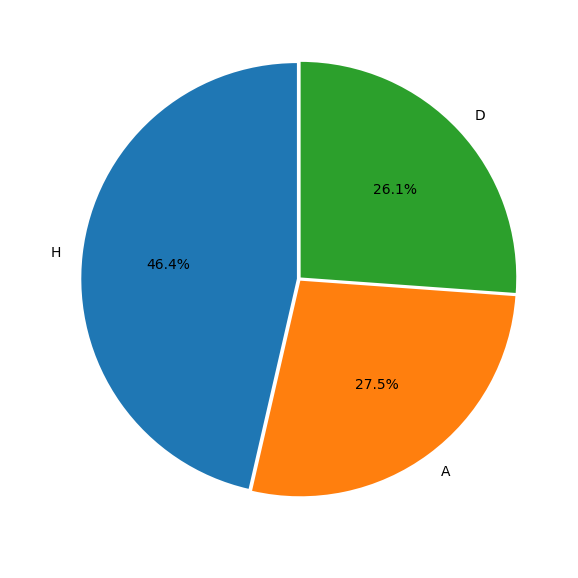

In [50]:
fig, ax = plt.subplots(figsize =(10,7))
ligamx['Result'].value_counts().plot.pie(autopct = '%1.1f%%', explode =[0.01,0.01,0.01], startangle =90)
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()


In [51]:
df_home=ligamx[['Team 1','homeGoals','AwayGoals']]
df_away=ligamx[['Team 2','homeGoals','AwayGoals']]

In [52]:
df_home=df_home.rename(columns={'Team 1':'Team','homeGoals':'GoalsScored','AwayGoals':'GoalsConceded'})
df_away=df_away.rename(columns={'Team 2':'Team','homeGoals':'GoalsConceded','AwayGoals':'GoalsScored'})

In [53]:
df_team_strength=pd.concat([df_home,df_away],ignore_index=True).groupby('Team').mean()
df_team_strength

,GoalsScored,GoalsConceded
Team,,
Atlético San Luis,0.941176,2.058824
CD Guadalajara Chivas,1.176471,1.000000
CF Monterrey,1.529412,1.235294
CF Pachuca,1.058824,0.823529
Club América,1.823529,1.294118
Club Atlas,0.764706,1.176471
Club León,1.588235,0.823529
Club Necaxa,0.941176,1.176471
Club Puebla,1.294118,1.470588


In [54]:
from scipy.stats import poisson
def predict_points(home, away):
    if home in df_team_strength.index and away in df_team_strength.index:
        # goals_scored * goals_conceded
        lamb_home = df_team_strength.at[home,'GoalsScored'] * df_team_strength.at[away,'GoalsConceded']
        lamb_away = df_team_strength.at[away,'GoalsScored'] * df_team_strength.at[home,'GoalsConceded']
        prob_home, prob_away, prob_draw = 0, 0, 0
        for x in range(0,11):
            for y in range(0, 11):
                p = poisson.pmf(x, lamb_home) * poisson.pmf(y, lamb_away)
                if x == y:
                    prob_draw += p
                elif x > y:
                    prob_home += p
                else:
                    prob_away += p

        points_home = 3 * prob_home + prob_draw
        points_away = 3 * prob_away + prob_draw
        return (points_home, points_away)
    else:
        return (0, 0)





In [55]:
print(predict_points('Club León', 'Club América'))

(1.7280860821910295, 1.058993994254386)
